In [1]:
!pip install pycountry
!pip install pycountry_convert

     |████████████████████████████████| 10.0MB 4.9MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=e55d3228cbf4804f78794e55c8eee881aafac72c69000a01750f0b9e80c1bced
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
     |████████████████████████████████| 235kB 10.8MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.0.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.0.3 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


Add one column as “continent” in the dataset and label each country/region in the dataset to an appropriate continent such as “Europe”, “Asia”, “Africa”, “North America”, “South America”, “Australia”, or “Antarctica”.

In [99]:
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as pl
import seaborn as sns

#Reading excel sheet and assigning it to data frame 

excel_sheet = "indicator hiv estimated prevalence% 15-49.xlsx"
df = pd.read_excel(excel_sheet)

#Extracing countries from Data Frame and assigning to a list

countryList = list(df['Estimated HIV Prevalence% - (Ages 15-49)'])
l = len(countryList)
continentList = []

#Assigning continent to each country
#If it is not country continent will be assigned as "Other"

for i in range (l):
    try:      
        country_alpha2 = pc.country_name_to_country_alpha2(countryList[i])
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        continentList.append(country_continent_name)
    except : 
        continentList.append("Other")

#Inerting Continents column in data frame 

df['Continents'] = continentList

df[['Estimated HIV Prevalence% - (Ages 15-49)','Continents',1979]]



,Estimated HIV Prevalence% - (Ages 15-49),Continents,1979
0,Abkhazia,Other,NaN
1,Afghanistan,Asia,NaN
2,Akrotiri and Dhekelia,Other,NaN
3,Albania,Europe,NaN
4,Algeria,Africa,NaN
...,...,...,...
270,Bonaire,North America,NaN
271,Sark,Other,NaN
272,Chinese Taipei,Other,NaN
273,Saint Eustatius,Other,NaN


In [0]:
df.to_csv('indicator hiv estimated prevalence% 15-49.csv')

Average of HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011.

In [100]:
df1 = df[['Estimated HIV Prevalence% - (Ages 15-49)',
                                             2000,
                                             2001,
                                             2002,
                                             2003,
                                             2004,
                                             2005,
                                             2006,
                                             2007,
                                             2008,
                                           '2009',
                                           '2010',
                                           '2011',
                                     'Continents']]

df2 = df1
df1['Average'] = df1.drop(['Estimated HIV Prevalence% - (Ages 15-49)', 'Continents'] , axis=1).apply(lambda x: x.mean(), axis=1)
df1.head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Estimated HIV Prevalence% - (Ages 15-49),2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continents,Average
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,Asia,0.060000
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,NaN
4,Algeria,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,NaN,NaN,NaN,Africa,0.082222


 To ﬁnd the country/region in each continent that has the highest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011.

In [101]:
Max_avgofcont = df1.groupby(['Continents']).apply(lambda dtg: dtg.nlargest(1, 'Average'))
Max_avgofcont.rename(columns = {'Average' : 'Max_AvgofCont'}, inplace = True)
Max_countofcont = list(Max_avgofcont['Estimated HIV Prevalence% - (Ages 15-49)'])
Max_avgofcont

,,Estimated HIV Prevalence% - (Ages 15-49),2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continents,Max_AvgofCont
Continents,,,,,,,,,,,,,,,,
Africa,28,Botswana,26.0,26.3,26.3,26.1,25.8,25.5,25.3,25.1,24.9,24.1,23.7,23.4,Africa,25.208333
Asia,224,Thailand,1.8,1.7,1.6,1.5,1.5,1.5,1.4,1.4,1.3,1.3,1.2,1.2,Asia,1.450000
Europe,70,Estonia,0.5,0.6,0.7,0.9,1.0,1.1,1.1,1.2,1.2,1.2,1.3,1.3,Europe,1.008333
North America,16,Bahamas,3.2,3.1,3.0,3.0,3.0,3.0,3.0,3.1,3.1,2.9,2.8,2.8,North America,3.000000
Oceania,174,Papua New Guinea,0.4,0.5,0.6,0.7,0.7,0.8,0.8,0.9,0.9,0.7,0.7,0.7,Oceania,0.700000
Other,53,Cote d'Ivoire,6.9,6.5,6.1,5.7,5.3,4.8,4.4,4.1,3.7,3.4,3.2,3.0,Other,4.758333
South America,94,Guyana,1.5,1.4,1.3,1.3,1.2,1.1,1.1,1.0,1.2,1.2,1.1,1.1,South America,1.208333


 To ﬁnd the country/region in each continent that has the lowest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011.

In [102]:
Min_avgofcont = df1.groupby(['Continents']).apply(lambda dtg: dtg.nsmallest(1, 'Average'))
Min_avgofcont.rename(columns = {'Average' : 'Min_AvgofCont'}, inplace = True)
Min_countofcont = list(Min_avgofcont['Estimated HIV Prevalence% - (Ages 15-49)'])
Min_avgofcont

,,Estimated HIV Prevalence% - (Ages 15-49),2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continents,Min_AvgofCont
Continents,,,,,,,,,,,,,,,,
Africa,65,Egypt,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,Africa,0.060000
Asia,1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.06,Asia,0.060000
Europe,54,Croatia,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,Europe,0.060000
North America,55,Cuba,0.06,0.06,0.06,0.06,0.10,0.10,0.10,0.10,0.10,0.10,0.20,0.20,North America,0.103333
Oceania,74,Fiji,0.06,0.06,0.06,0.10,0.10,0.10,0.10,0.10,0.10,0.06,0.06,0.10,Oceania,0.083333
Other,122,Lao,0.06,0.06,0.06,0.10,0.10,0.10,0.10,0.20,0.20,0.20,0.30,0.30,Other,0.148333
South America,26,Bolivia,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.30,0.30,0.30,South America,0.225000


The highest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011 in each continent.

Text(0.5, 1.0, '\n\nHighest average of HIV estimated prevalance from year 2000 to 2011 of ages 15-49 in each continent\n')

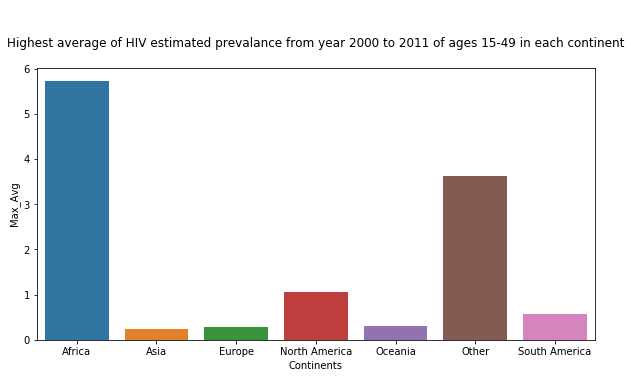

In [103]:
df_high = df2.groupby(['Continents']).mean()
df_high['Max_Avg'] = df_high.max(axis=1)

#Using Seaborn to plot bar graph 
sns.set_context({"figure.figsize": (10, 5)})
ax = sns.barplot(x=df_high.index,y="Max_Avg",data=df_high)
pl.title('\n\nHighest average of HIV estimated prevalance from year 2000 to 2011 of ages 15-49 in each continent\n')



The lowest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011 in each continent.

Text(0.5, 1.0, '\n\nLowest average of HIV estimated prevalance from year 2000 to 2011 of ages 15-49 in each continent\n')

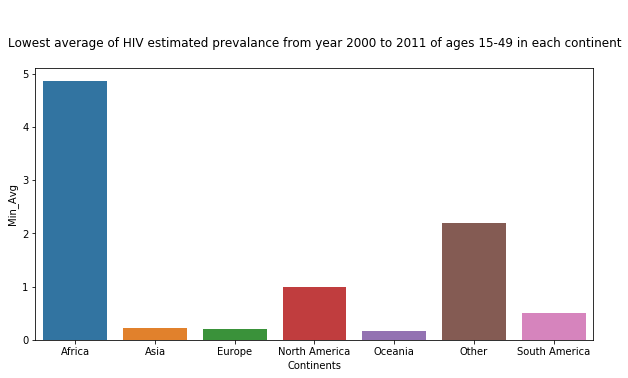

In [104]:
df_low = df2.groupby(['Continents']).mean()
df_low['Min_Avg'] = df_low.min(axis=1)

#Using Seaborn to plot bar graph 

sns.set_context({"figure.figsize": (10, 5)})
ax = sns.barplot(x=df_low.index,y="Min_Avg",data=df_low)
pl.title('\n\nLowest average of HIV estimated prevalance from year 2000 to 2011 of ages 15-49 in each continent\n')



To show the highest and lowest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011 in each continent. 

Text(0, 0.5, 'Average HIV Estimated Prevalence')

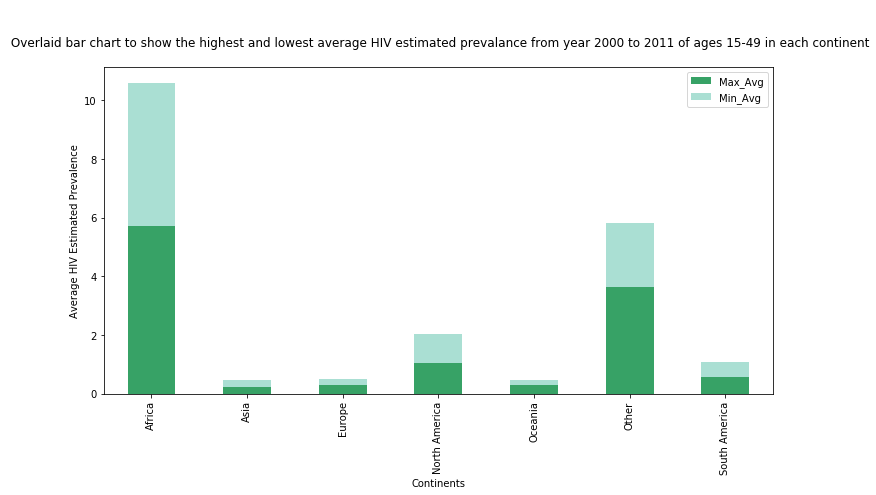

In [105]:
from matplotlib.colors import ListedColormap
df_max_min = df2.groupby(['Continents']).mean()
df_max_min['Max_Avg'] = df_max_min.max(axis=1)
df_max_min['Min_Avg'] = df_max_min.min(axis=1)
bg_max_min = df_max_min[['Max_Avg','Min_Avg']]

bg_max_min.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("BuGn_r",2 )), 
          figsize=(12,6))
pl.title('\n\n Overlaid bar chart to show the highest and lowest average HIV estimated prevalance from year 2000 to 2011 of ages 15-49 in each continent\n')
pl.ylabel('Average HIV Estimated Prevalence')


 A country/region that is diﬀerent from the average highest or lowest HIV estimated prevalence of people ages from 15 to 49 from year 2000 to 2011 from each continent.

In [106]:
new_cont_df = df.groupby('Continents', group_keys=False).apply(pd.DataFrame.sample, n=1)
cont_other = list(new_cont_df['Estimated HIV Prevalence% - (Ages 15-49)'])
while cont_other == Max_countofcont or cont_other == Min_countofcont:
  new_cont_df = df.groupby('Continents', group_keys=False).apply(pd.DataFrame.sample, n=1)
  cont_other = list(new_cont_df['Estimated HIV Prevalence% - (Ages 15-49)'])
cont_other

['Comoros',
 'Taiwan',
 'Slovenia',
 'Puerto Rico',
 'Kiribati',
 'U.S. Pacific Islands',
 'Bolivia']

In [107]:
new_cont_df = new_cont_df[['Estimated HIV Prevalence% - (Ages 15-49)', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, '2009', '2010', '2011', 'Continents']]
new_cont_df['max_average'] = list(bg_max_min['Max_Avg'])
new_cont_df['min_average'] = list(bg_max_min['Min_Avg'])
new_cont_df.reset_index(drop=True)

,Estimated HIV Prevalence% - (Ages 15-49),2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Continents,max_average,min_average
0,Comoros,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.10,0.1,0.1,Africa,5.732000,4.865000
1,Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,0.236667,0.213644
2,Slovenia,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,Europe,0.293529,0.193714
3,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America,1.052941,0.987500
4,Kiribati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,0.300000,0.165000
5,U.S. Pacific Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,3.620000,2.200000
6,Bolivia,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.30,0.3,0.3,South America,0.563636,0.509091


Text(0.5, 0, '\nContinents')

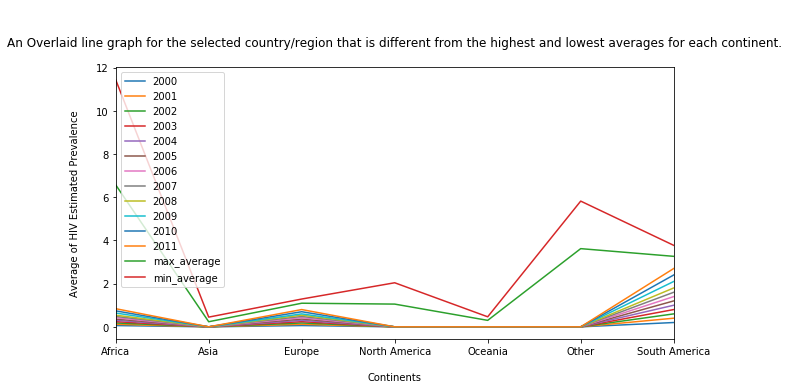

In [108]:
new_cont_df.plot(x='Continents', y=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, '2009', '2010', '2011', 'max_average', 'min_average'], kind='line', stacked=True)
pl.title("\n\nAn Overlaid line graph for the selected country/region that is different from the highest and lowest averages for each continent.\n")
pl.ylabel('Average of HIV Estimated Prevalence\n')
pl.xlabel('\nContinents')

To calculate the average HIV estimated prevalence of people ages from 15 to 49 for each year in the dataset for each continent.



Text(0.5, 0, '\nYear')

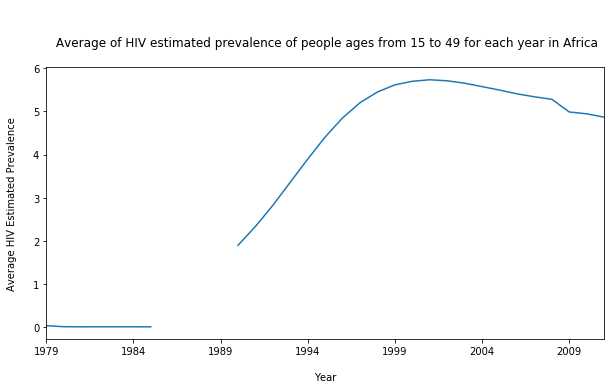

In [109]:
df_cont = df
df_cont = df_cont.groupby('Continents').mean()
df_cont.iloc[0].plot(kind = 'line')
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Africa\n')
pl.ylabel('Average HIV Estimated Prevalence\n')
pl.xlabel('\nYear')

Text(0.5, 0, '\nYear')

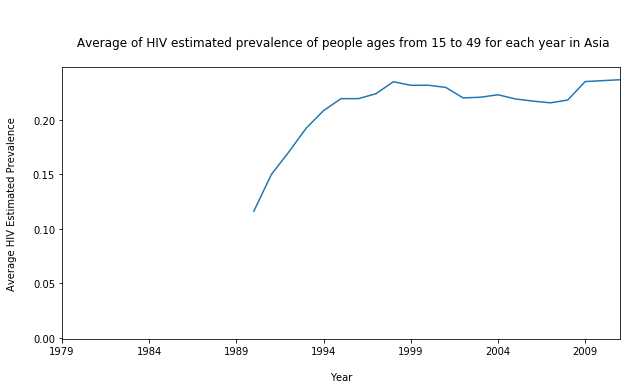

In [55]:
df_cont.iloc[1].plot(kind = 'line')
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Asia\n')
pl.ylabel('Average HIV Estimated Prevalence\n')
pl.xlabel('\nYear')

Text(0.5, 0, '\nYear')

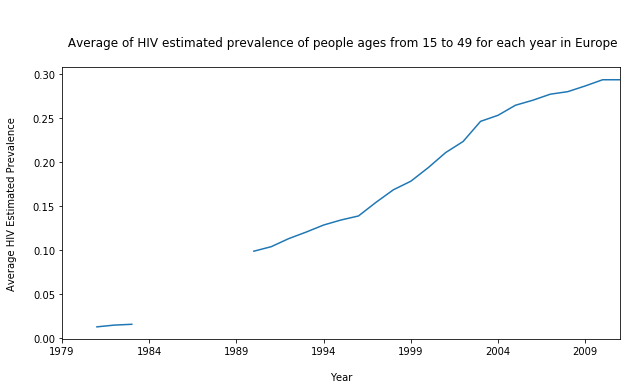

In [58]:
df_cont.iloc[2].plot(kind = 'line')
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Europe\n')
pl.ylabel('Average HIV Estimated Prevalence\n')
pl.xlabel('\nYear')

Text(0.5, 0, 'Year')

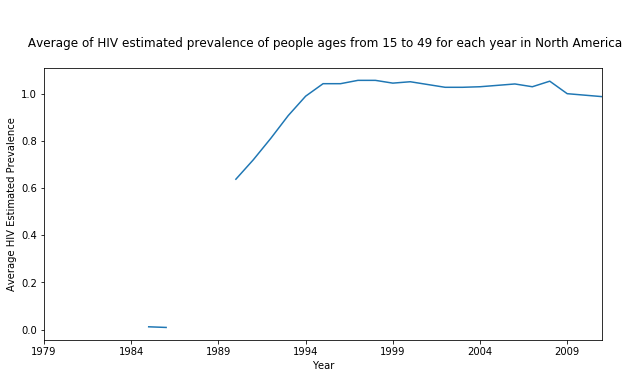

In [57]:
df_cont.iloc[3].plot(kind = 'line')
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in North America\n')
pl.ylabel('Average HIV Estimated Prevalence')
pl.xlabel('Year')

Text(0.5, 0, '\nYear')

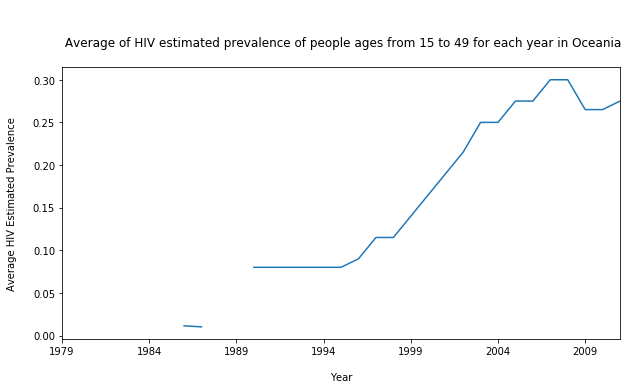

In [56]:
df_cont.iloc[4].plot(kind = 'line')
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Oceania\n')
pl.ylabel('Average HIV Estimated Prevalence\n')
pl.xlabel('\nYear')

Text(0.5, 0, '\nYear')

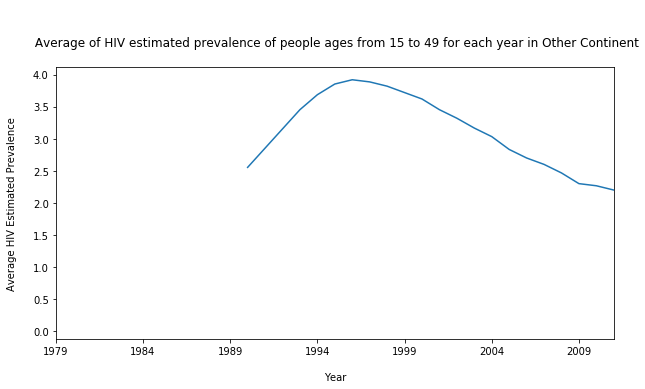

In [59]:
df_cont.iloc[5].plot(kind = 'line')
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in Other Continent\n')
pl.ylabel('Average HIV Estimated Prevalence\n')
pl.xlabel('\nYear')

Text(0.5, 0, '\nYear')

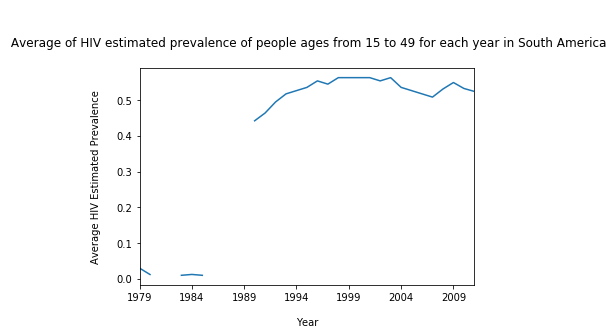

In [40]:
df_cont.iloc[6].plot(kind = 'line')
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year in South America\n')
pl.ylabel('Average HIV Estimated Prevalence\n')
pl.xlabel('\nYear')

 To calculate the average HIV estimated prevalence of people ages from 15 to 49 for each year in the dataset for all continents.

Text(0.5, 0, '\nYear')

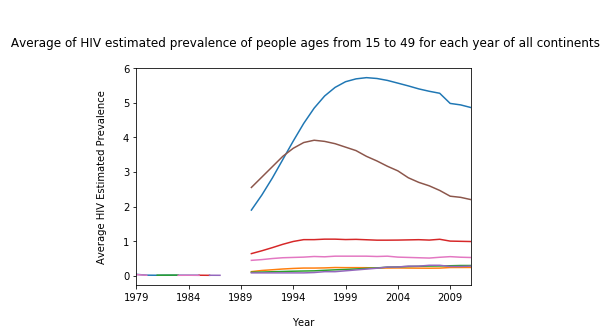

In [41]:
df_cont.iloc[0].plot(kind = 'line')
df_cont.iloc[1].plot(kind = 'line')
df_cont.iloc[2].plot(kind = 'line')
df_cont.iloc[3].plot(kind = 'line')
df_cont.iloc[4].plot(kind = 'line')
df_cont.iloc[5].plot(kind = 'line')
df_cont.iloc[6].plot(kind = 'line')


pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 for each year of all continents\n')
pl.ylabel('Average HIV Estimated Prevalence\n')
pl.xlabel('\nYear')

To show the average HIV estimated prevalence in each continent in year 1990.

Text(0, 0.5, 'Average HIV Estimated Prevalence\n')

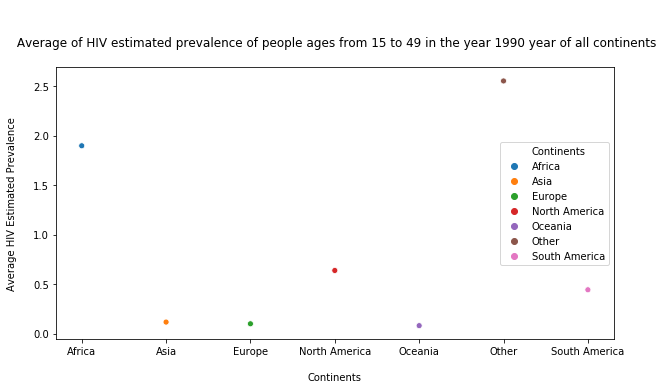

In [283]:
df1 = df_cont[[1990]]
x_axis = []
y_axis = []
y_axis = df1[1990].tolist()
x_axis = df1.index

#Scatter plot 

pl.figure(figsize=(10,5))
sns.scatterplot(x=x_axis, y=y_axis,hue=df1.index);
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 in the year 1990 year of all continents\n')
pl.xlabel('\nContinents')
pl.ylabel('Average HIV Estimated Prevalence\n')


To show the average HIV estimated prevalence in each continent in year 2010.

Text(0, 0.5, 'Average HIV Estimated Prevalence\n')

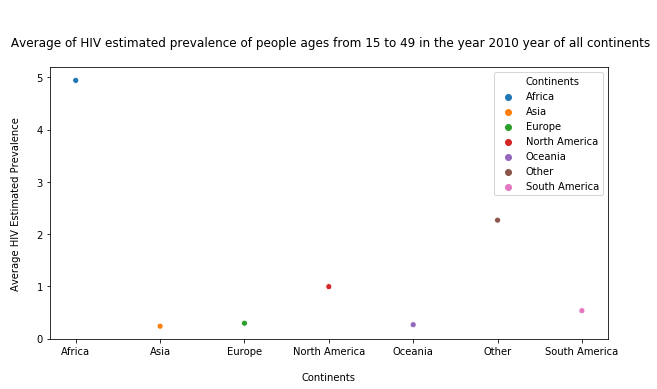

In [60]:
df1 = df_cont[['2010']]
x_axis = []
y_axis = []
y_axis = df1['2010'].tolist()
x_axis = df1.index

pl.figure(figsize=(10,5))
sns.scatterplot(x=x_axis, y=y_axis,hue=df1.index);
pl.title('\n\n Average of HIV estimated prevalence of people ages from 15 to 49 in the year 2010 year of all continents\n')
pl.xlabel('\nContinents')
pl.ylabel('Average HIV Estimated Prevalence\n')
